## Supervised knn regression

In [18]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Training KNeighborsRegressor...
best parameter:  {'n_neighbors': 25, 'weights': 'uniform', 'leaf_size': 1}
best score:  -98.9849139008




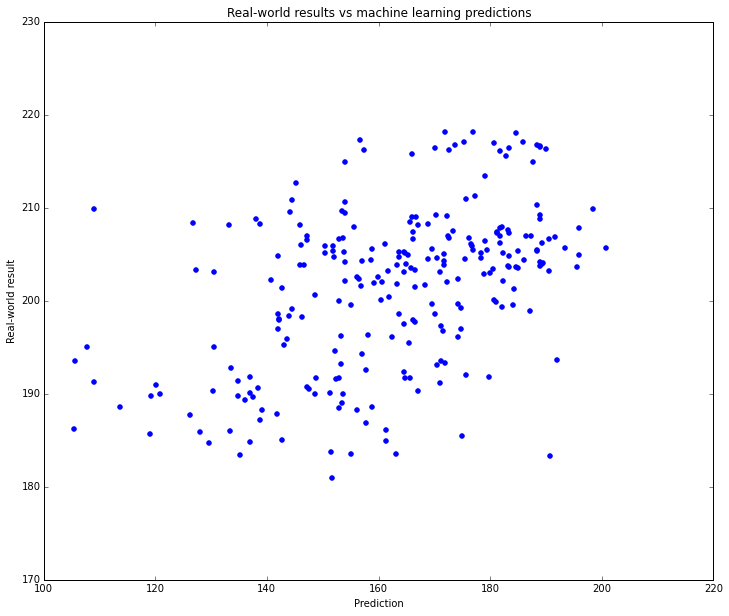

Score - variance between prediction and real-world results (n_neighbors = 25)
regr.score(X_test, y_test): -23.53
Mean squared error:  1812.29858663 



In [24]:
import time
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error


def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def plot_selected(df, columns, start_index, end_index):

    plot_data(df.ix[start_index:end_index,columns], title="SPY")
    
    
def plot_data(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    
def train_knn(knn, X, y):
    print "Training {}...".format(knn.__class__.__name__)
    start = time.time()
    
    # parameters for gridsearchCV
    k = [1,5,10,15,20,25,30]
    leaves = [1,5,10,15,20,25,30]
    weights = ['uniform', 'distance']
    parameters = {'n_neighbors': k, 'leaf_size': leaves, 'weights': weights}
    
    # Implement GridSearchCV
    knn = GridSearchCV(knn, parameters, cv=10)
    knn.fit(X, y)
    
    print "best parameter: ", knn.best_params_
    print "best score: ", knn.best_score_
    print "\n"
    
    end = time.time()
    return knn

    
def show_knn_regression():
    
    df = pd.read_csv(symbol_to_path('SPY'), index_col='Date', 
                parse_dates=True, 
                usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], 
                na_values=['nan'])
    
    # sort data chronologically
    df = df.sort_index(ascending=True, axis=0)
    
    # add new column to view Adj Close 5 days later
    df['Adj_Close_5_Days_Later'] = df['Adj Close']
    df['Adj_Close_5_Days_Later'] = df['Adj_Close_5_Days_Later'].shift(-5)
    # print df.head(6)
    
    # reduce data by date
    # df_smaller_set = df['20150101':'20160101']
    
    # Slice and plot
    # plot_selected(df, ['Adj Close'], '2015-01-01', '2016-01-01')
    
    # Get the features and labels from the stock dataset
    ## X = df.iloc[0:1253,:-1]
    ## y = df.iloc[0:1253, -1]
    
    # Get the features and labels from the stock dataset
    # X = df.iloc[:,:-1]
    # y = df.iloc[:, -1]
    # Split the data into training/testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    ##### NOTE:  Can't use gridsearchCV.train_test_split because it doesn't do roll-forward cross validation. #####
    # print "\n", "df.shape: ", df.shape, "\n"
    X_train = df.iloc[0:1000,:-1]
    y_train = df.iloc[0:1000, -1]
    X_test = df.iloc[1000:1253,:-1]
    y_test = df.iloc[1000:1253, -1]
    
    # Use knn regression algorithm
    knn = KNeighborsRegressor()
    train_knn(knn, X_train, y_train)
    
    # Create linear regression object
    regr = KNeighborsRegressor()
    # regr = KNeighborsRegressor(n_neighbors=25, weights='uniform', leaf_size=1)

    # Fit model to training data
    regr.fit(X_train, y_train)
    
    # Plot outputs
    plt.figure(figsize=(12,10))
    plt.title("Real-world results vs machine learning predictions")
    plt.xlabel("Prediction")
    plt.ylabel("Real-world result")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    
    # Explained variance score: 1 is perfect
    # Score
    print "Score - variance between prediction and real-world results (n_neighbors = 25)"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    
    # The mean square error
    print "Mean squared error: ", mean_squared_error(regr.predict(X_test), y_test), "\n"
    # print("Residual sum of squares: %.2f"
          # % np.mean((regr.predict(X_test) - y_test) ** 2))
   
if __name__ == "__main__":
    show_knn_regression()